#U.S Accident Data Analysis

## Data Downloading

In [14]:
pip install opendatasets --upgrade --quiet

In [15]:
import opendatasets as od

dataset_url= 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(dataset_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [16]:
data_filename='./us-accidents/US_Accidents_Dec20_updated.csv'

##Data Preparation and Cleaning


--> Load the File using Pandas

--> Look for info using desription function

--> Fix any missing or incorrect values


In [17]:
import pandas as pd


In [18]:
df=pd.read_csv(data_filename)

AttributeError: ignored

In [19]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [21]:
df.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [22]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df= df.select_dtypes(include=numerics)
numeric_df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

## Q&A

---> Does climate impact accidents?

---> Which is more accident prone States (Top 10) ?

---> Find the PerCapita of accidents

In [23]:
#Percentage of missing columns

missing_percentages=(df.isna().sum().sort_values(ascending=False)/len(df))*100
missing_percentages=missing_percentages[missing_percentages > 1]
missing_percentages

Number               69.000715
Precipitation(in)    33.675953
Wind_Chill(F)        29.637007
Wind_Speed(mph)       8.499773
Humidity(%)           3.001786
Visibility(mi)        2.916170
Weather_Condition     2.902714
Temperature(F)        2.838469
Wind_Direction        2.760965
Pressure(in)          2.392643
Weather_Timestamp     1.996222
dtype: float64

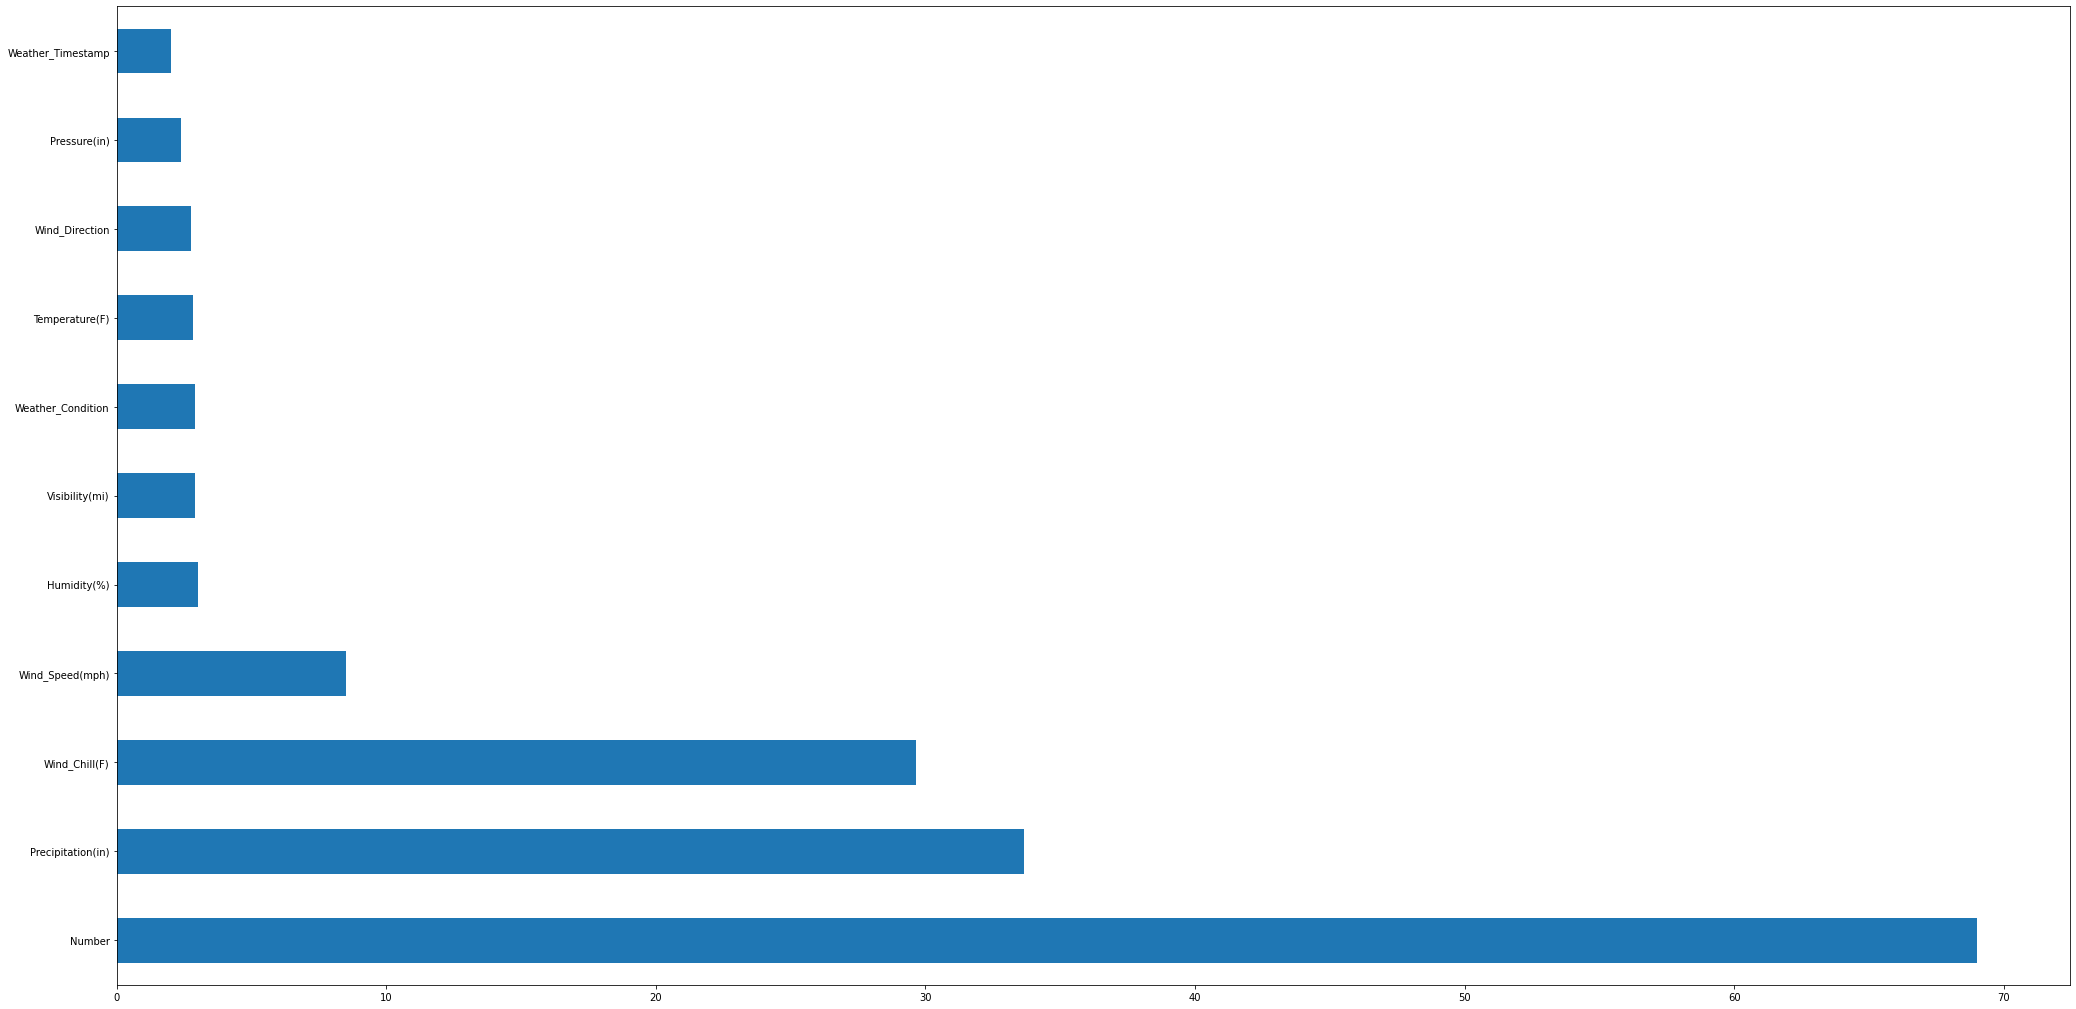

In [24]:
missing_percentages.plot(kind='barh', figsize=(35,18))

##Exploratory Analysis and Visualization

### Columns we analyze

*   City
*   Start Time
*   Start Lat, Start Long
*   Temperature(F)
*   Visibility(mi)
*   List item









In [25]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [26]:
len(df.City.unique())

10658

In [27]:
cities_by_accident= df.City.value_counts().sort_values(ascending=False)

In [28]:
i=0
for city in df.City:
  str(city).lower()
  if city in {'ny','new york','newyork'}:
    i+=1
print(i)      

0


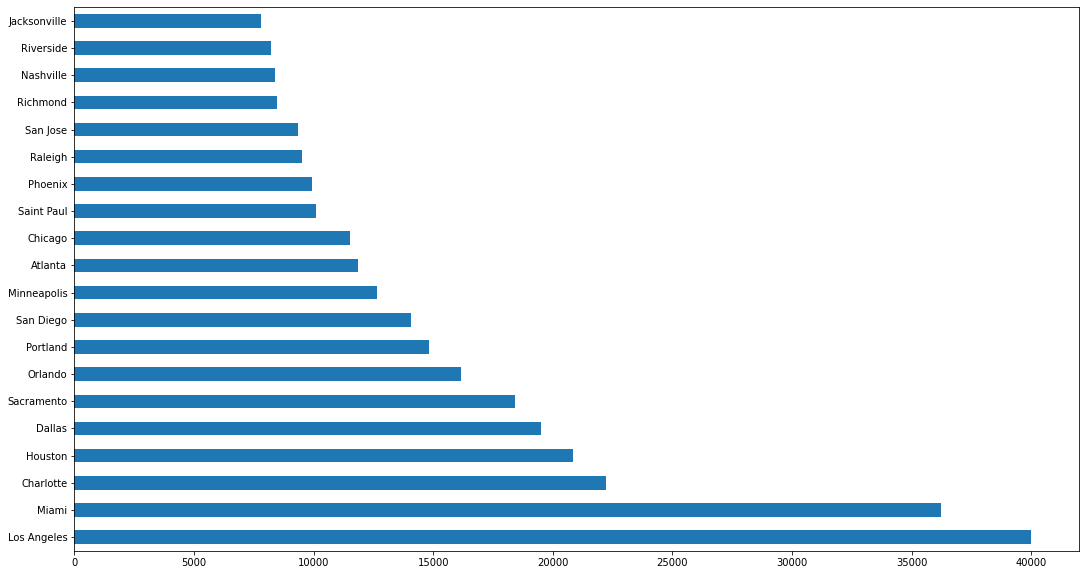

In [29]:
cities_by_accident[:20].plot(kind='barh',figsize=(18,10))



In [73]:
import seaborn as sns
sns.set_style('darkgrid')

In [31]:
cities_by_accident.describe()

count    10657.000000
mean       142.252135
std        871.274089
min          1.000000
25%          4.000000
50%         13.000000
75%         60.000000
max      39984.000000
Name: City, dtype: float64

In [32]:
# len(cities_by_accident[cities_by_accident > 1000])/len(cities_by_accident)
len(cities_by_accident[cities_by_accident == 1])

1167

In [62]:
type(df.Start_Time[0])
df.Start_Time=pd.to_datetime(df.Start_Time)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


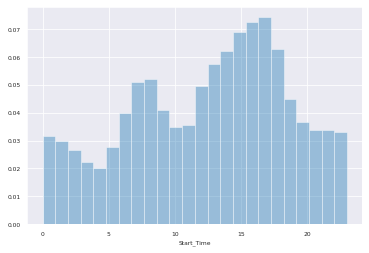

In [74]:
sns.distplot(df.Start_Time.dt.hour,bins=24,norm_hist=True,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


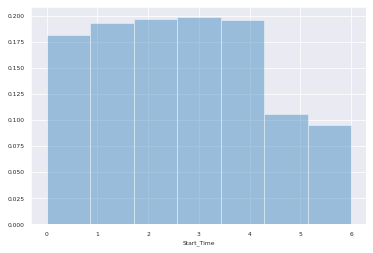

In [79]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=3+4,norm_hist=True,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


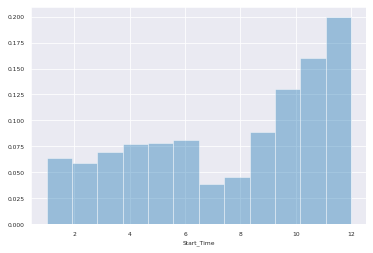

In [87]:
sns.distplot(df.Start_Time.dt.month,bins=8+4,norm_hist=True,kde=False)


##Start Latitude and Longitude

In [92]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [94]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

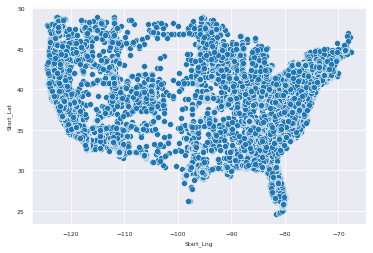

In [100]:
sample_df=df.sample(int(0.1*len(df)))
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat)

In [101]:
import folium


In [116]:
lat,lon=df.Start_Lat[0],df.Start_Lng[0]
lat,lon

KeyError: ignored

In [119]:
df_sample=df.sample(int(0.1*len(df)))
cood=list(zip(list(df_sample.Start_Lat),list(df_sample.Start_Lng)))

In [114]:
from folium.plugins import HeatMap

In [121]:
map= folium.Map(location=[df_sample.Start_Lat.mean(), df_sample.Start_Lng.mean()])
HeatMap(cood).add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.

##Summary and Conclusion



1.   Highest populated city NY is not in DataSet.
2.   1553 cities have accidents occureing more than that of average of all cities.
3.   2.35% cities have accidents greater than 1K.
4.   **1167 cities have accidents has one which is not likely to true need to investigate the issue.**
5. No of Accidents is high between the 6:00 to 10:00
6. Weekend have minimal accidents than on week days







# us-accident-analysis

Use the "Run" button to execute the code.

In [34]:
!pip install jovian --upgrade --quiet

In [35]:
import jovian

In [72]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accident-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/achuthakarthikeya/us-accident-analysis


'https://jovian.ai/achuthakarthikeya/us-accident-analysis'